In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from pymongo import MongoClient

In [2]:
fetched_data = []

connection = MongoClient('localhost', 27017)
db = connection['Product1']
collection = db['10-27-2015']
rec_count = 0
for rec in collection.find():
    if 'Power' in rec:
        #print str(rec['time'] + ' | ' + str(rec['Power']))
        fetched_data.append((rec['date'], rec['time'], rec['Power'][0]))
        rec_count += 1
        if rec_count > 500: break
connection.close()

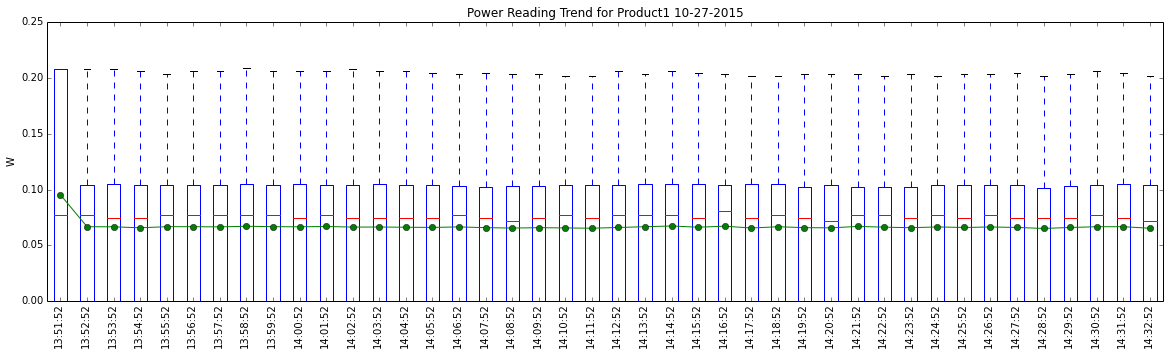

In [5]:
aggregated_data = {}

for data in fetched_data:
    key = str(data[1])
    if key not in aggregated_data:
        aggregated_data[key] = [float(str(data[2]))]
    else:
        aggregated_data[key].append(float(str(data[2])))

x_vals = sorted(aggregated_data.keys())

plt.figure(figsize=(20, 5))
plt.boxplot([aggregated_data[x] for x in x_vals])
plt.plot(range(1, len(x_vals)+1), [sum(aggregated_data[x])/float(len(aggregated_data[x])) for x in x_vals], '-go')
plt.gca().set_xticklabels(x_vals, rotation=90)
plt.title("Power Reading Trend for Product1 10-27-2015")
plt.ylabel("W")
plt.show()